#TASK 1 ( READING THE FILE )

**The dataset contains the following columns:**

**timestamp:** Date and time information.

**cnt:** Count of some measurable attribute.

**t1 and t2:** Likely temperature-related data.

**hum:** Humidity.

**wind_speed:** Wind speed.

**weather_code:** Weather condition code.

**is_holiday:** Indicator for holidays.

**is_weekend:** Indicator for weekends.

**season:** Seasonal information.







#**TASK 2** ( CHECK MISSING VALUES & IF THERE ARE SOME DUPLICATE ROWS OR NOT)


1.   No missing values were found in the dataset.
2.   No duplicate rows were found.



#**TASK 3** ( Plotting the distribution of discrete features such as season, holiday, weekend, and weather code.)

<ipython-input-2-b7eb4cd43c81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="viridis")
<ipython-input-2-b7eb4cd43c81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="viridis")
<ipython-input-2-b7eb4cd43c81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="viridis")
<ipython-input-2-b7eb4cd43c81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

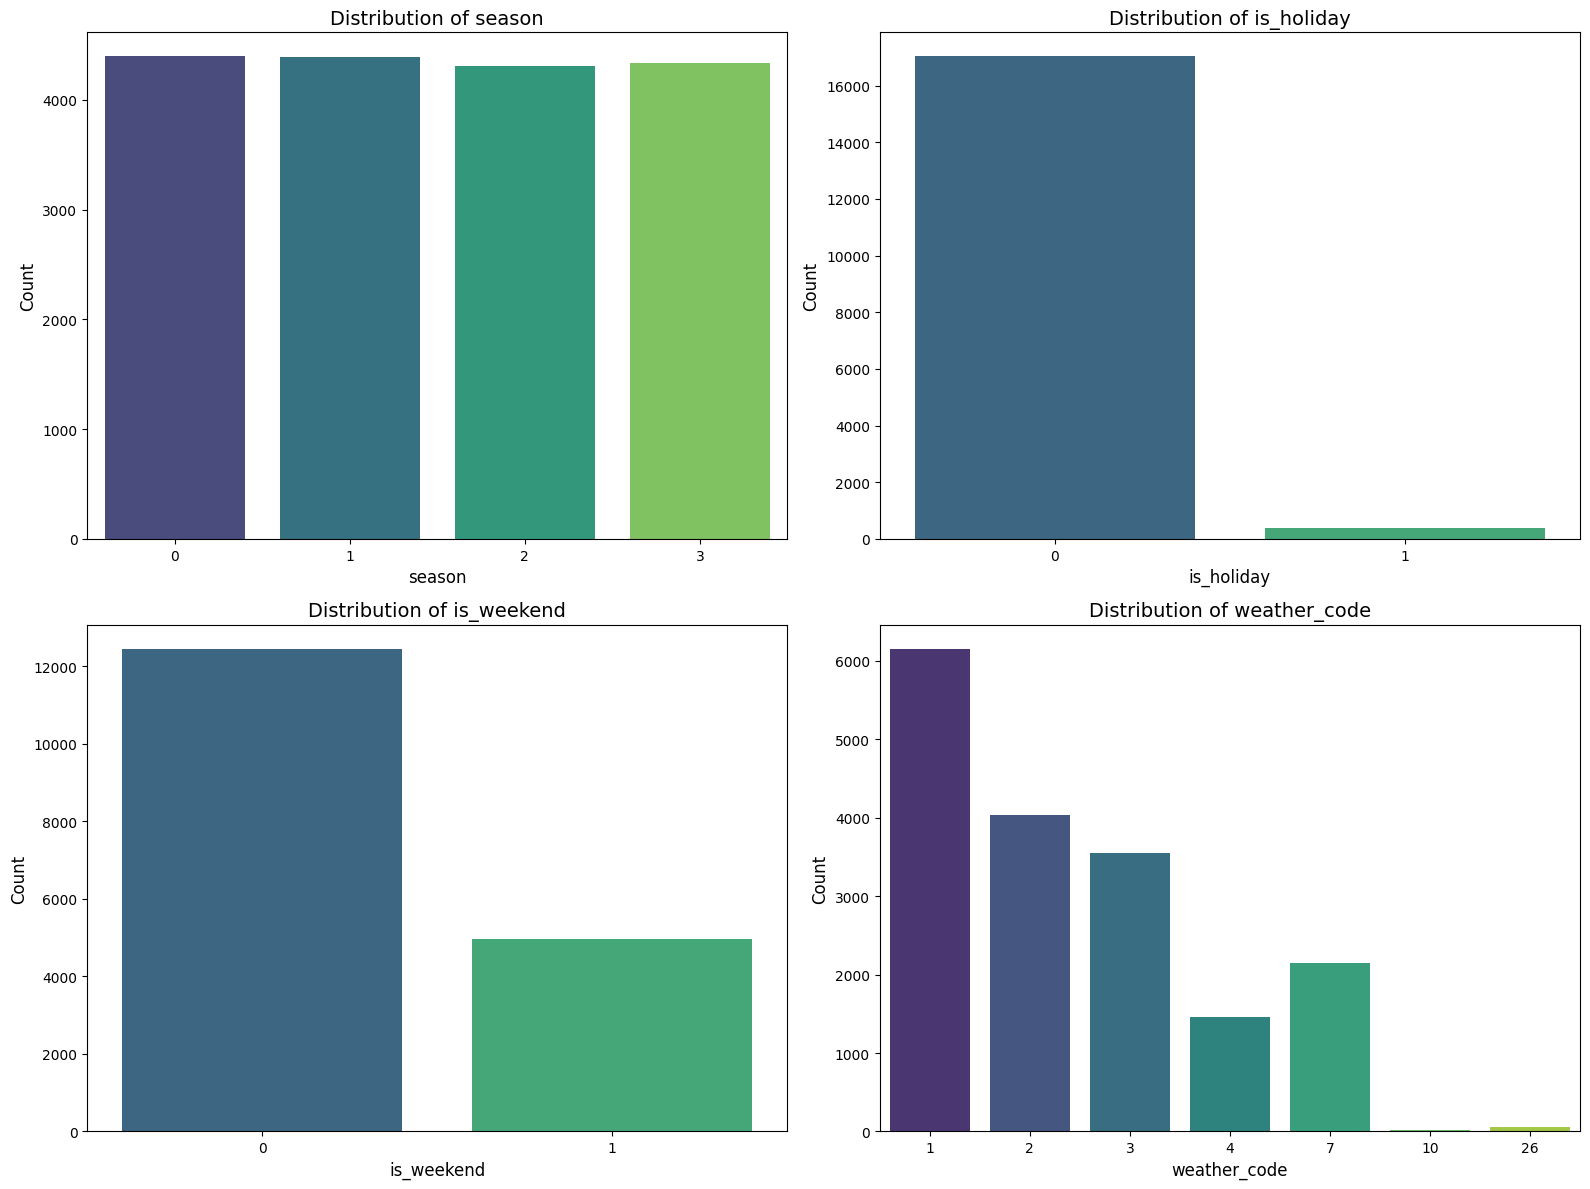

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Define discrete features to plot
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Set up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(discrete_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


#**TASK 04** ( GENERATE PYTHON CODE TO LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX )

In [3]:
import pandas as pd

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Check the data types of each column
print("Data types before transformation:")
print(df.dtypes)

# Convert 'timestamp' column to datetime type and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Verify the changes
print("\nData types after transformation:")
print(df.dtypes)
print("\nDataFrame with 'timestamp' as index:")
print(df.head())


Data types before transformation:
timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

Data types after transformation:
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

DataFrame with 'timestamp' as index:
                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0             3   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0             1   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0   

#**TASK 05** ( GENERATE PYTHON CODE TO MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC). )

In [4]:
import pandas as pd

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract new time-related features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_month'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['timestamp'].dt.hour

# Map the seasons if not already in the dataset
# Example mapping: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall (adjust based on your dataset)
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
if 'season' in df.columns:
    df['season_name'] = df['season'].map(season_mapping)

# Display the updated DataFrame
print("Extracted Features:")
print(df[['timestamp', 'year', 'month', 'day_of_month', 'day_of_week', 'hour', 'season_name']].head())

# Save the updated DataFrame to a new file if needed
df.to_excel('dataset_with_features.xlsx', index=False)
print("\nNew dataset saved as 'dataset_with_features.xlsx'")


Extracted Features:
            timestamp  year  month  day_of_month  day_of_week  hour  \
0 2015-01-04 00:00:00  2015      1             4            6     0   
1 2015-01-04 01:00:00  2015      1             4            6     1   
2 2015-01-04 02:00:00  2015      1             4            6     2   
3 2015-01-04 03:00:00  2015      1             4            6     3   
4 2015-01-04 04:00:00  2015      1             4            6     4   

  season_name  
0      Summer  
1      Summer  
2      Summer  
3      Summer  
4      Summer  

New dataset saved as 'dataset_with_features.xlsx'


#**TASK 5** ( GENERATE PYTHON CODE TO VISUALIZE THE CORRELATION WITH A HEATMAP )

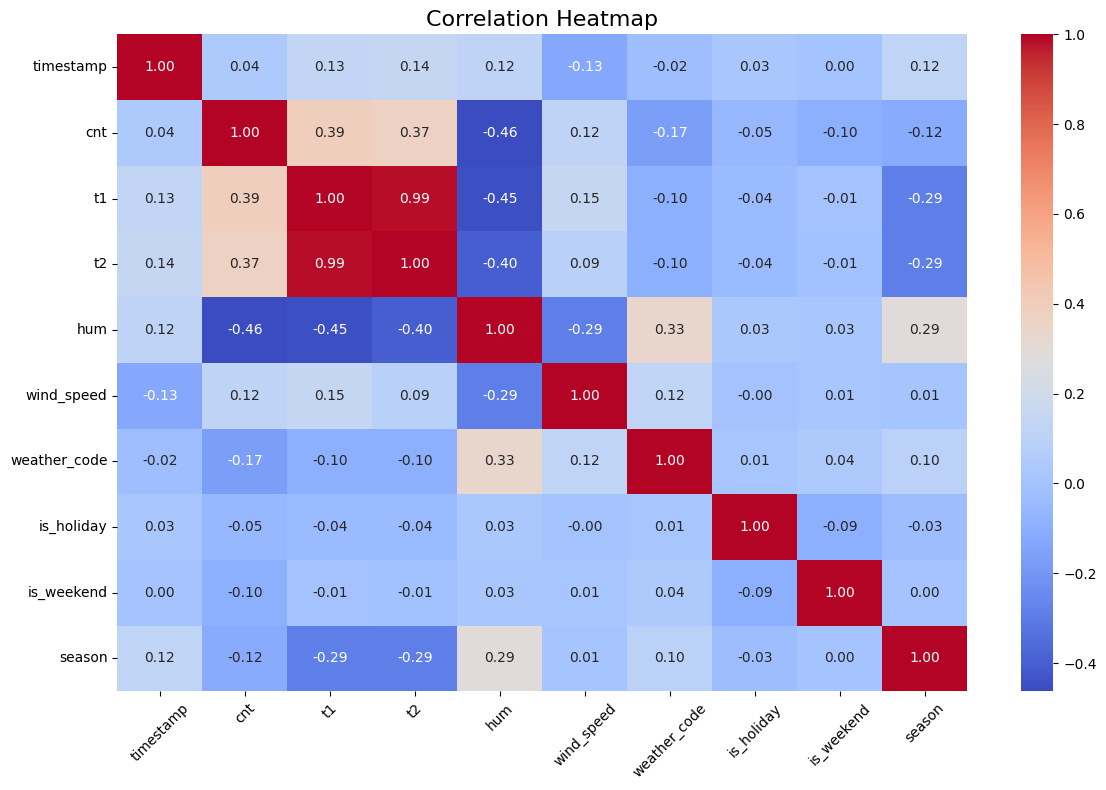

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Compute the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the heatmap
plt.show()


#**TASK 07** ( GENERATE PYTHON CODE TO VISUALIZE THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT )

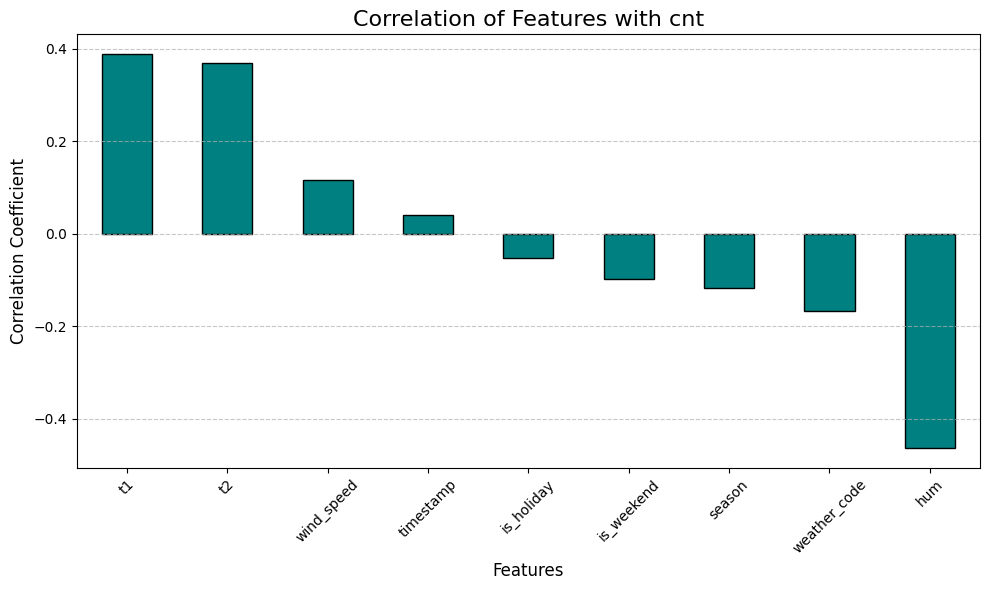

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Compute correlations of all numerical features with the target variable ('cnt')
target_variable = 'cnt'  # Replace 'cnt' with your target variable if different
correlations = df.corr()[target_variable].sort_values(ascending=False)

# Remove the target variable itself from the plot
correlations = correlations[correlations.index != target_variable]

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='teal', edgecolor='black')

# Add titles and labels
plt.title(f"Correlation of Features with {target_variable}", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#**TASK 08** ( GENERATE PYTHON CODE TO PLOT BIKE SHARES OVER TIME BY USING LINEPLOT )

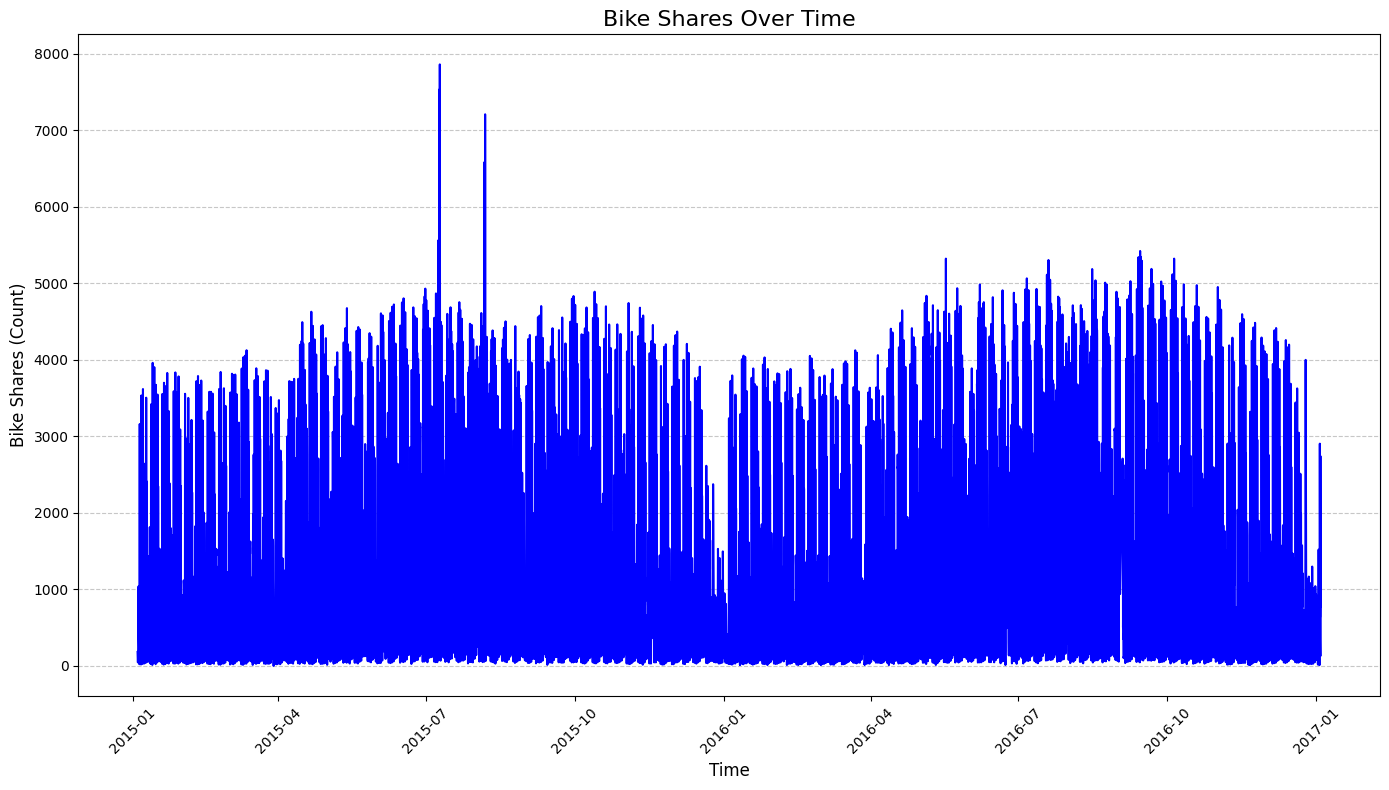

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index if not already done
df.set_index('timestamp', inplace=True)

# Plot bike shares over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='cnt', color='blue', linewidth=1.5)

# Add title and labels
plt.title("Bike Shares Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format x-axis for better readability
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


#**TASK 09** ( GENERATE PYTHON CODE TO PLOT BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINE PLOT, POINTPOT, BARPLOT) )

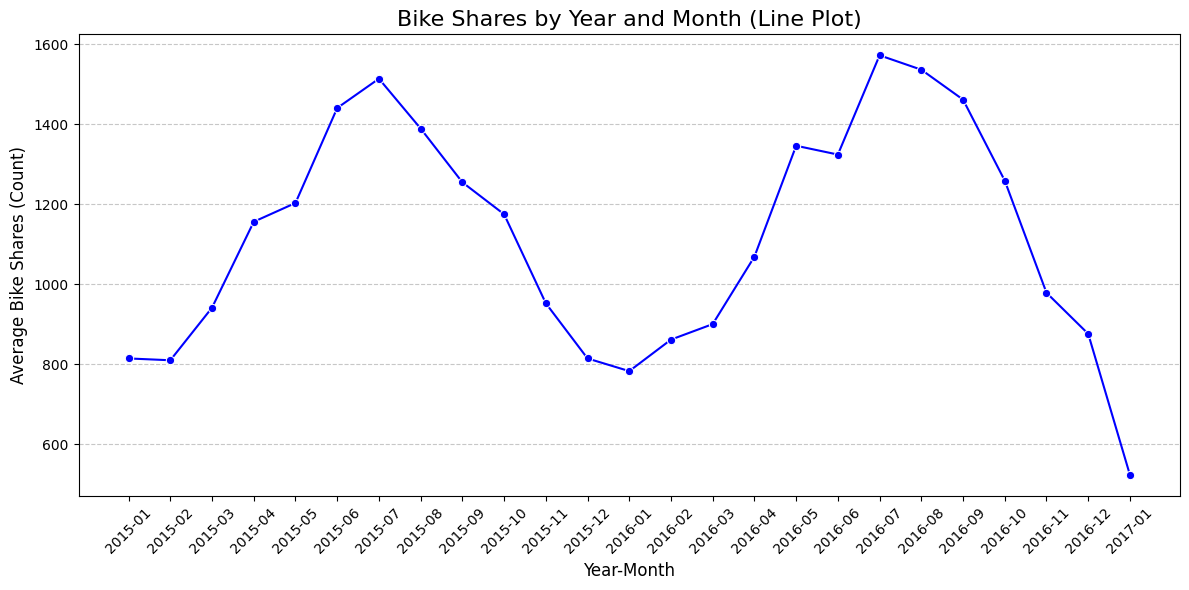

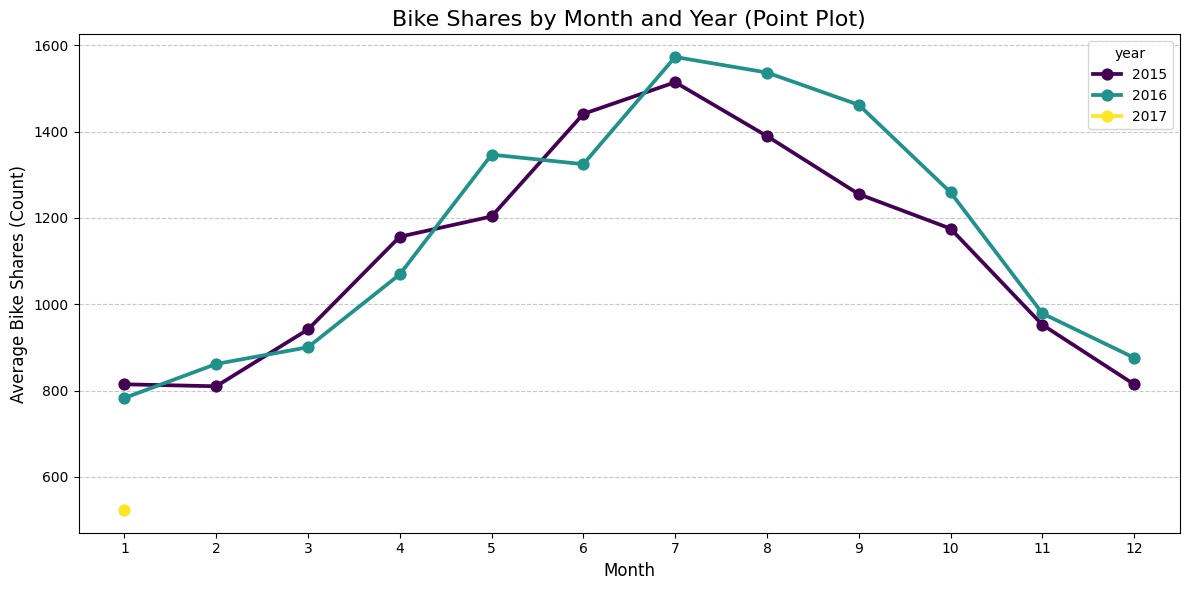

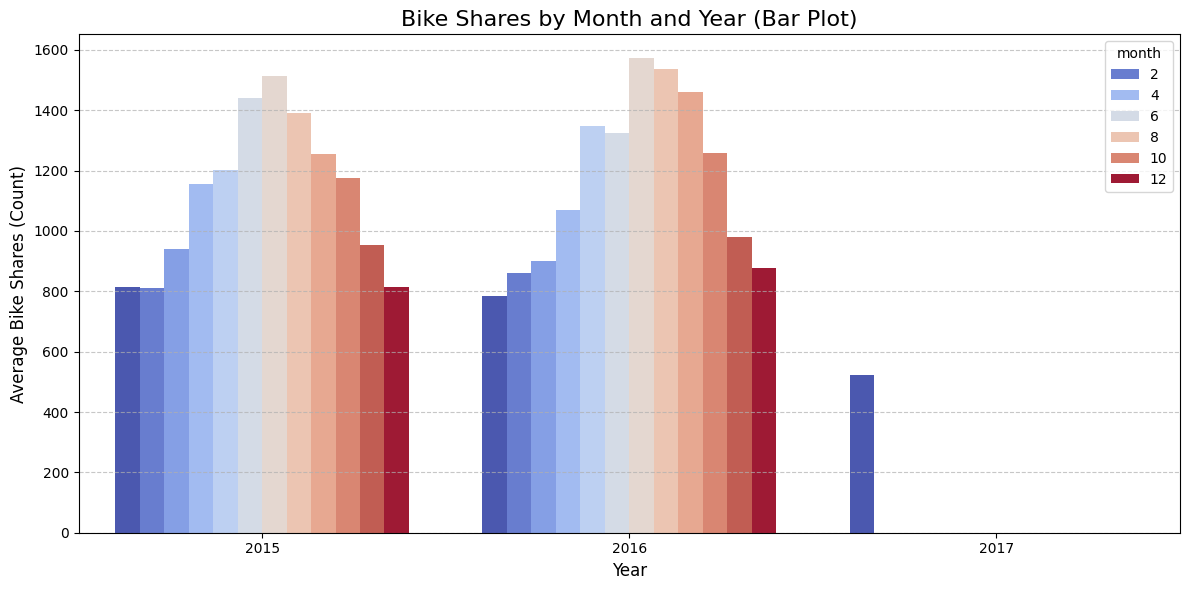

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year and month for grouping
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# Aggregate bike shares by year and month
grouped_df = df.groupby(['year', 'month'])['cnt'].mean().reset_index()

# Create a "Year-Month" column for better visualization
grouped_df['year_month'] = grouped_df['year'].astype(str) + '-' + grouped_df['month'].astype(str).str.zfill(2)

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='year_month', y='cnt', marker='o', color='blue')
plt.title("Bike Shares by Year and Month (Line Plot)", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=grouped_df, x='month', y='cnt', hue='year', palette='viridis')
plt.title("Bike Shares by Month and Year (Point Plot)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='year', y='cnt', hue='month', palette='coolwarm')
plt.title("Bike Shares by Month and Year (Bar Plot)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**TASK 10** ( GENERATE PYTHON CODE TO PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON) )

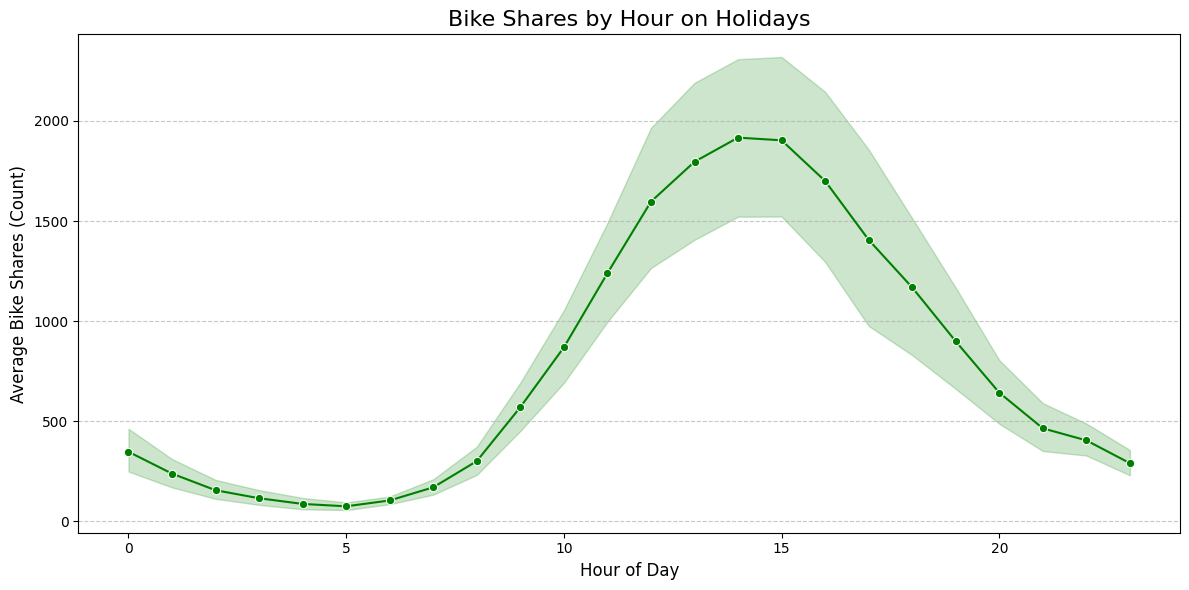

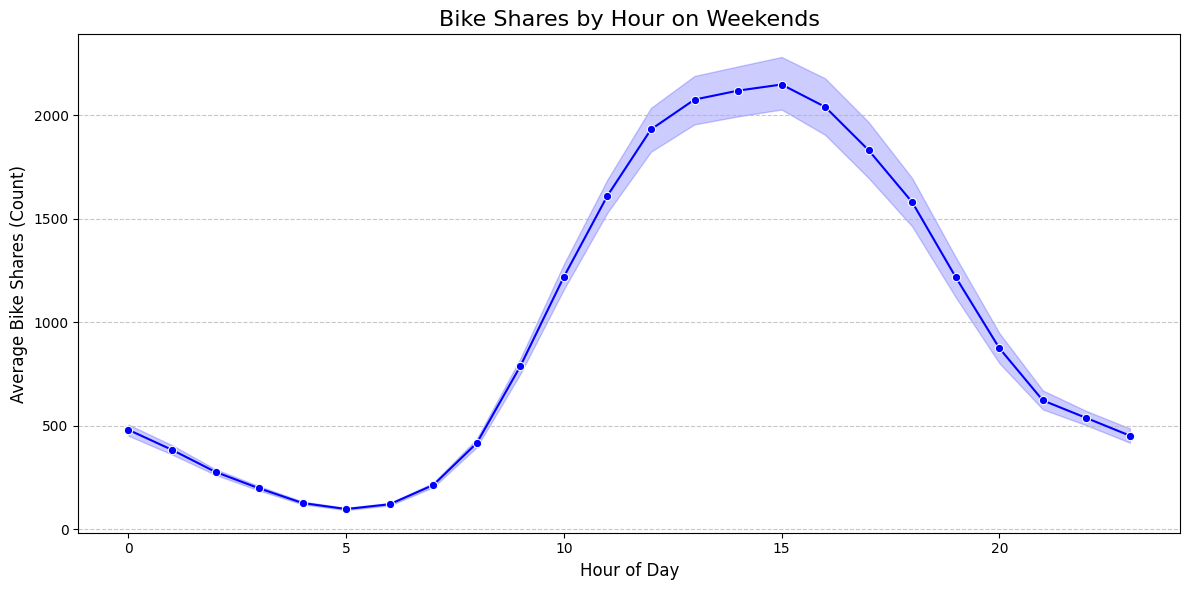

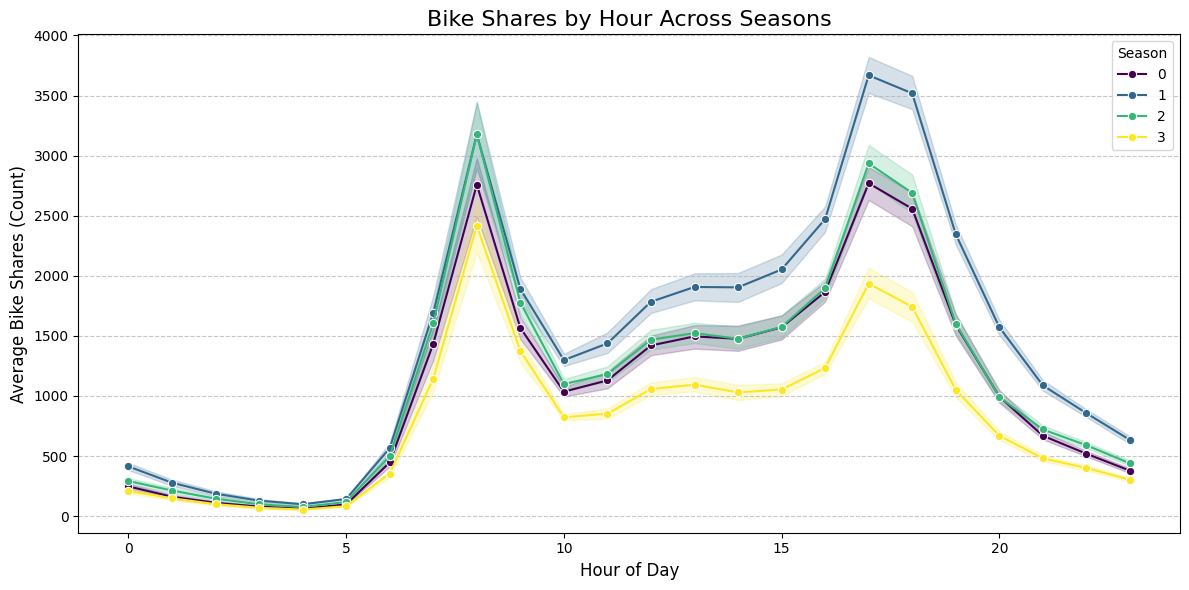

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the hour of the day
df['hour'] = df['timestamp'].dt.hour

# Plot 1: Bike Shares by Hour on Holidays
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['is_holiday'] == 1], x='hour', y='cnt', estimator='mean', color='green', marker='o')
plt.title("Bike Shares by Hour on Holidays", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Bike Shares by Hour on Weekends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['is_weekend'] == 1], x='hour', y='cnt', estimator='mean', color='blue', marker='o')
plt.title("Bike Shares by Hour on Weekends", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Bike Shares by Hour Across Seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='season', estimator='mean', palette='viridis', marker='o')
plt.title("Bike Shares by Hour Across Seasons", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.legend(title='Season', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**TASK 11** ( GENERATE PYTHON CODE TO PLOT BIKE SHARES BY DAY OF THE WEEK )

<ipython-input-10-5d09edfb574a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='cnt', palette='viridis')


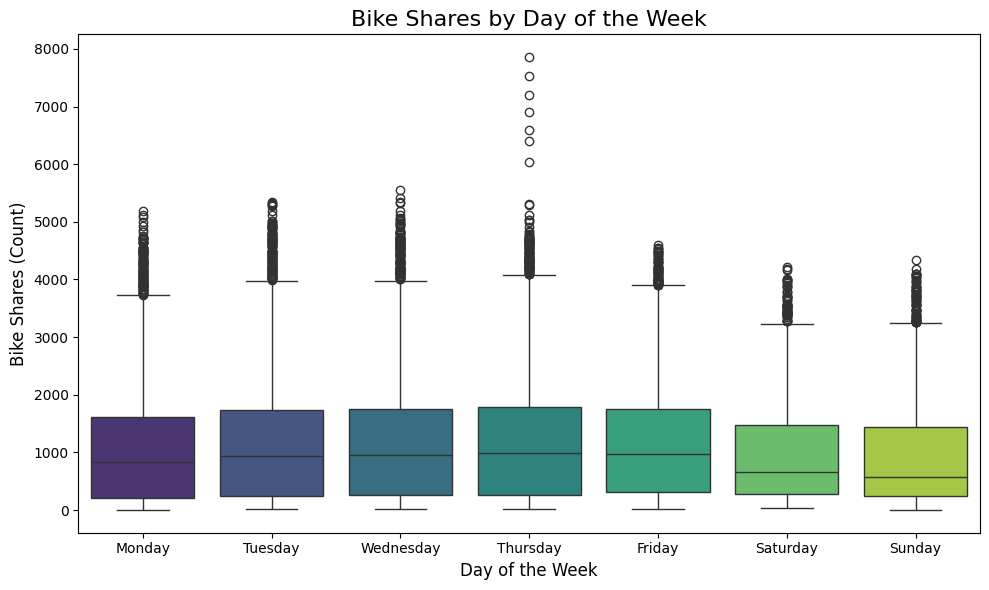

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day of the week from the 'timestamp' column (Monday=0, Sunday=6)
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Plot bike shares by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_week', y='cnt', palette='viridis')

# Add titles and labels
plt.title("Bike Shares by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Bike Shares (Count)", fontsize=12)

# Format x-axis to show days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(7), labels=days, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


#**TASK 12** ( GENERATE PYTHON CODE TO PLOT BIKE SHARES BY DAY OF THE MONTH)

<ipython-input-11-e6675522055c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_month', y='cnt', palette='coolwarm')


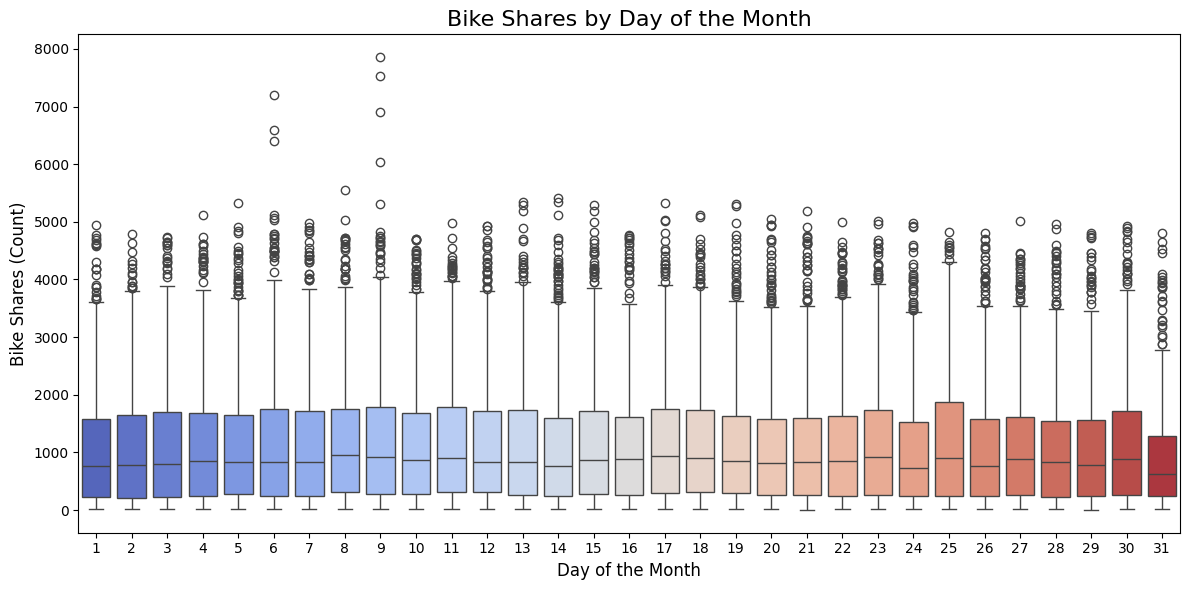

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day of the month from the 'timestamp' column
df['day_of_month'] = df['timestamp'].dt.day

# Plot bike shares by day of the month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_month', y='cnt', palette='coolwarm')

# Add titles and labels
plt.title("Bike Shares by Day of the Month", fontsize=16)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Bike Shares (Count)", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


#**TASK 13** ( GENERATE PYTHON CODE TO PLOT BIKE SHARES BY YEAR )

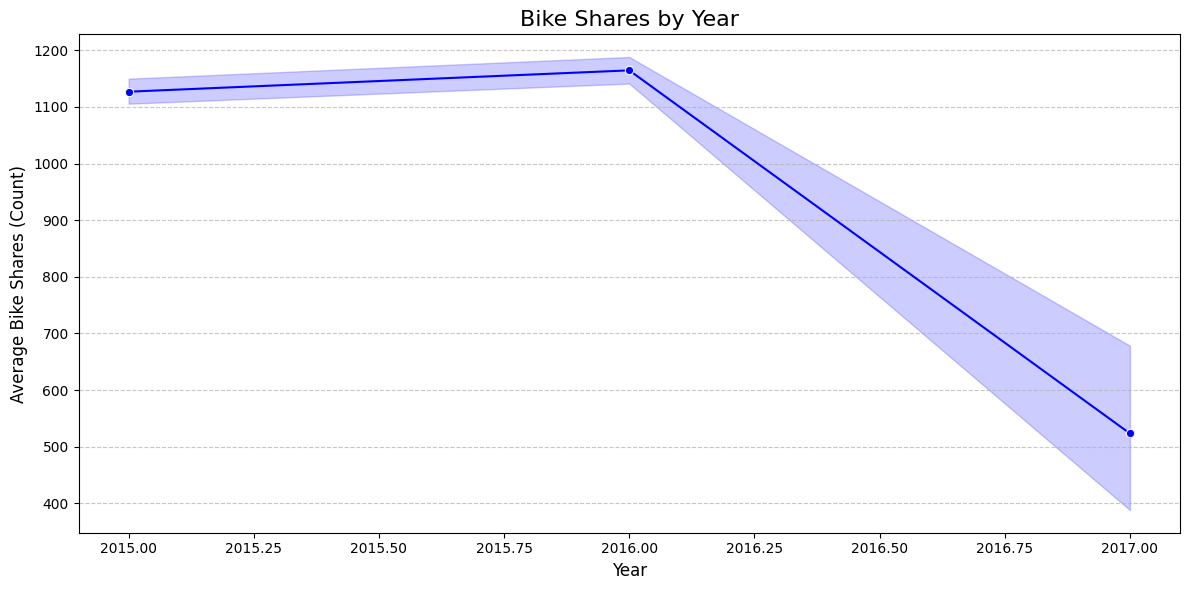

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year from the timestamp
df['year'] = df['timestamp'].dt.year

# Plot bike shares by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='cnt', estimator='mean', color='blue', marker='o')

# Add titles and labels
plt.title("Bike Shares by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#TASK 13 ( GENERATE PYTHON CODE TO PLOT BIKE SHARES ON HOLIDAYS BY SEASON )

<ipython-input-14-5b33fc3f8fee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_holidays, x='season', y='cnt', palette='coolwarm')


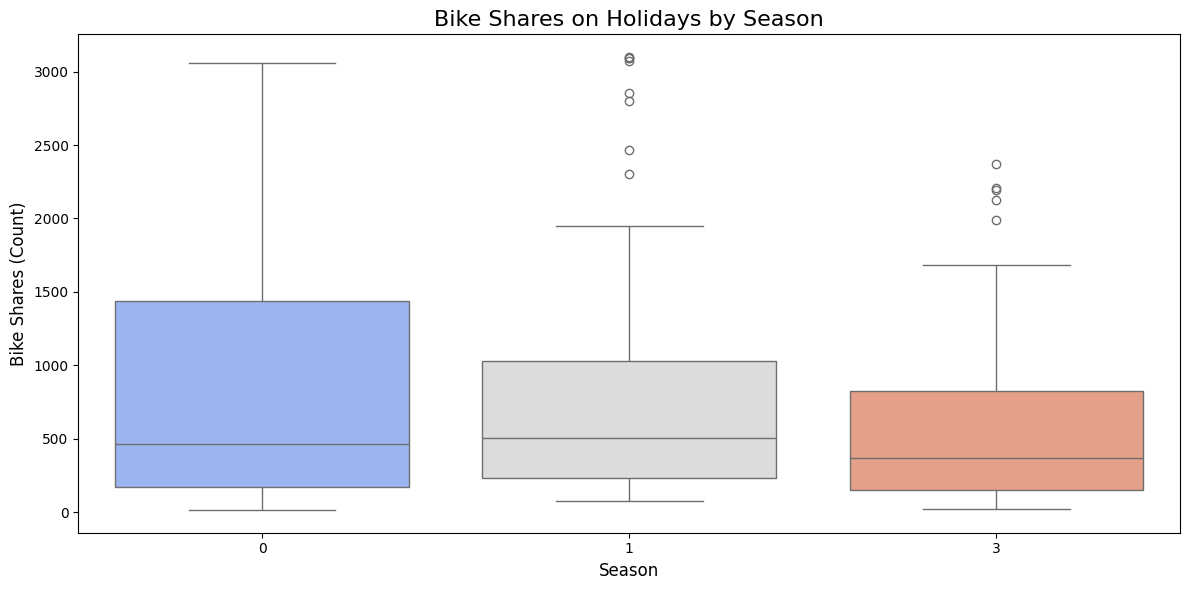

In [14]:
# Filter the dataset for holidays
df_holidays = df[df['is_holiday'] == 1]

# Plot bike shares on holidays by season
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_holidays, x='season', y='cnt', palette='coolwarm')

# Add titles and labels
plt.title("Bike Shares on Holidays by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Bike Shares (Count)", fontsize=12)
plt.tight_layout()
plt.show()


#**TASK 14** ( GENERATE PYTHON CODE TO VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT )

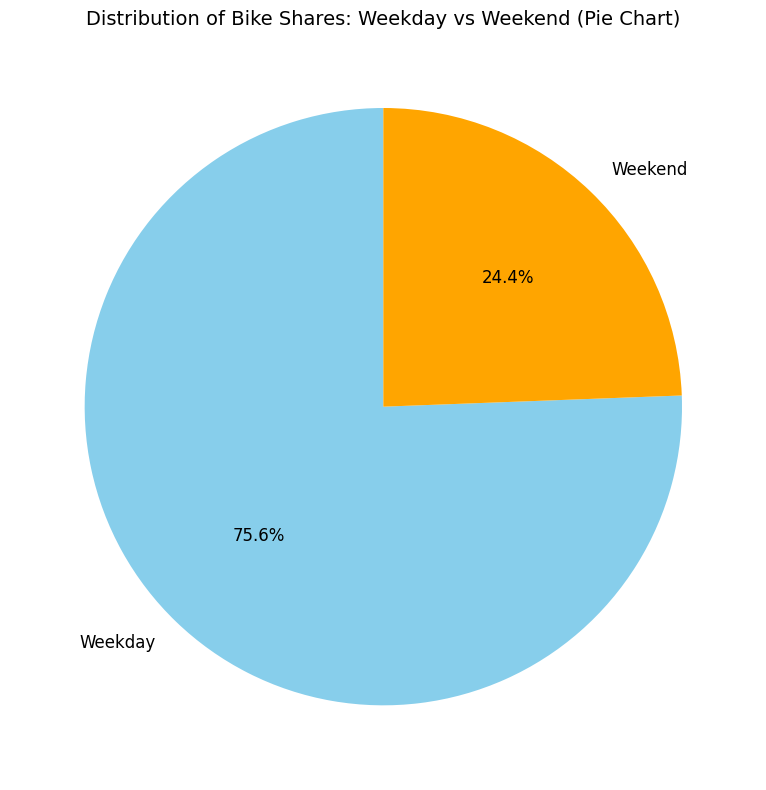

<ipython-input-15-cc1fd440540e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


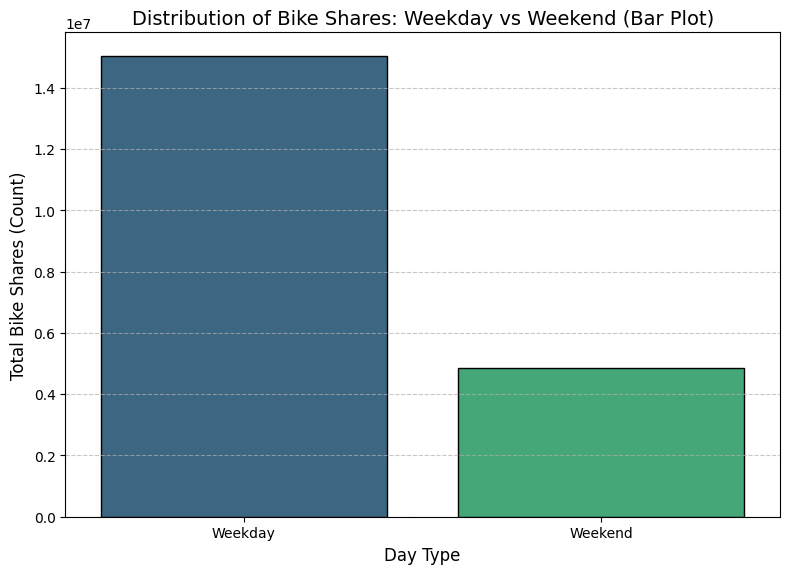

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Add a 'day_type' column for weekday (0) or weekend (1)
df['day_type'] = df['is_weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

# Aggregate bike shares by day type
day_type_counts = df.groupby('day_type')['cnt'].sum()

# Plot 1: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    day_type_counts,
    labels=day_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange'],
    textprops={'fontsize': 12}
)
plt.title("Distribution of Bike Shares: Weekday vs Weekend (Pie Chart)", fontsize=14)
plt.tight_layout()
plt.show()

# Plot 2: Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=day_type_counts.index,
    y=day_type_counts.values,
    palette='viridis',
    edgecolor='black'
)
plt.title("Distribution of Bike Shares: Weekday vs Weekend (Bar Plot)", fontsize=14)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Total Bike Shares (Count)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**TASK 15** ( GENERATE PYTHON CODE TO PLOT THE DISTRIBUTION OF WEATHER CODE BY SEASON. )



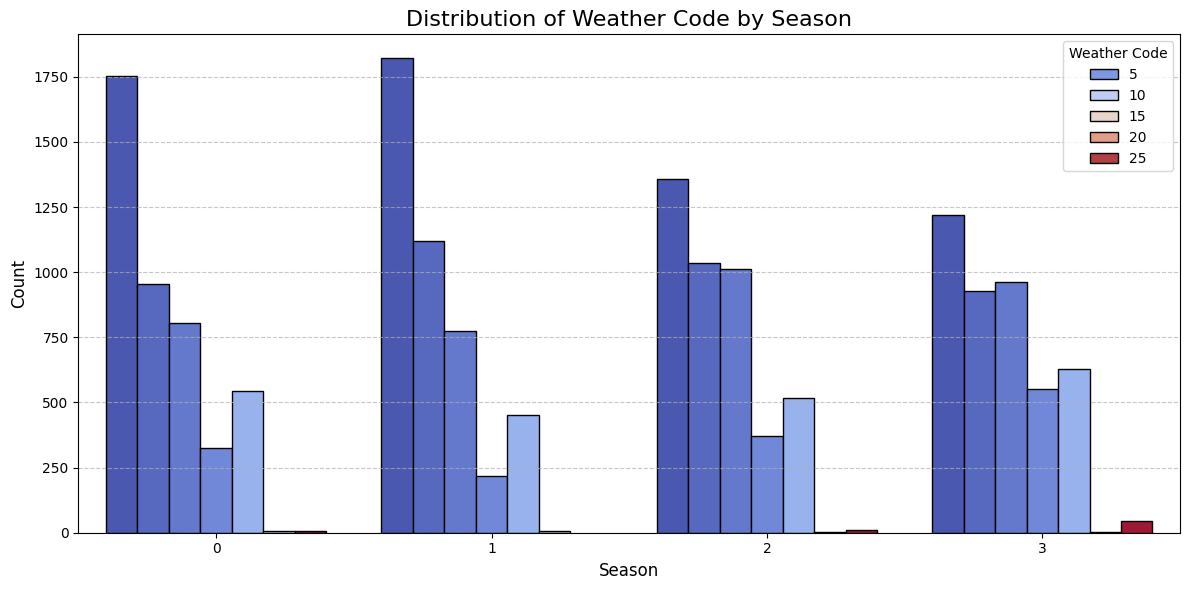

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the distribution of weather code by season
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season', hue='weather_code', palette='coolwarm', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Weather Code by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Weather Code", loc="upper right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
